In [1]:
from src.experiment_based_function import SEEDS
import pandas as pd
%matplotlib inline

In [2]:
import os
import glob
from zipfile import ZipFile
import re
from pandas.compat import StringIO

In [3]:
eval_or_grid='eval'

In [19]:
def get_exp9_result(eval_or_grid='eval'):
    res = []    
    for fn in glob.glob('experiment_1001/exp9_social/*/*/%s_res.csv' % eval_or_grid):
        _, fam_or_not, seed, _ = fn.split(os.path.sep)
        seed = seed.replace('seed_','')
        df = pd.read_csv(fn, index_col=0)
        df['fam_or_not'] = fam_or_not
        df['seed'] = seed
        res.append(df)
    return pd.concat(res)

In [20]:
eval_res = get_exp9_result('eval')

In [21]:
eval_res.columns, eval_res.shape

(Index(['#ftr_all', '#ftr_keep', '#test_sample', '#train_sample',
        'feature_selection', 'ftr_combo_name', 'model_name', 'test_acc',
        'test_f1_macro', 'test_f1_micro', 'test_f1_weighted', 'test_mse',
        'test_n_classes', 'test_precision_macro', 'test_precision_micro',
        'test_precision_weighted', 'test_recall_macro', 'test_recall_micro',
        'test_recall_weighted', 'train_acc', 'train_f1_macro', 'train_f1_micro',
        'train_f1_weighted', 'train_mse', 'train_n_classes',
        'train_precision_macro', 'train_precision_micro',
        'train_precision_weighted', 'train_recall_macro', 'train_recall_micro',
        'train_recall_weighted', 'upsample', 'y_dist', 'y_dist_up',
        'fam_or_not', 'seed'],
       dtype='object'), (300, 36))

In [23]:
print('train', eval_res.train_n_classes.value_counts().to_dict())
print('test', eval_res.test_n_classes.value_counts().to_dict())

print('train', 'test')
print(eval_res.apply(lambda x: (x.train_n_classes, x.test_n_classes), axis=1).value_counts())

train {5: 300}
test {5: 270, 4: 30}
train test
(5, 5)    270
(5, 4)     30
dtype: int64


In [24]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [41]:
keys = ['fam_or_not', 'upsample', 'ftr_combo_name', 'model_name', 'feature_selection']
keys = ['fam_or_not', 'ftr_combo_name', 'model_name']


In [42]:
info = eval_res.groupby(['fam_or_not','upsample']).mean()[['#test_sample', '#train_sample','test_n_classes','train_n_classes', ]]

In [43]:
means = eval_res.groupby(keys).mean()[f1_choices]
stds = eval_res.groupby(keys).std()[f1_choices]
# means = means.reset_index().merge(info.reset_index(), how='left').set_index(keys)

f1_type = test_f1_micro


test_f1_micro
fam_or_not   ftr_combo_name                 model_name               
not_familiar RoadNet+Segment_TOTAL_~2014    BAGcls           0.591250
             RoadNet+Segment_NO_TOTAL_~2014 BAGcls           0.585000
             RoadNet+Segment_TOTAL_~2014    XGBcls           0.560000
             Segment_NO_TOTAL_~2014         BAGcls           0.537500
             RoadNet+Segment_NO_TOTAL_~2014 XGBcls           0.532500
             RoadNet                        BAGcls           0.528750
                                            XGBcls           0.523750
familiar     RoadNet+Segment_TOTAL_~2014    BAGcls           0.517808
             RoadNet                        RFreg            0.516438
             RoadNet+Segment_TOTAL_~2014    RFreg            0.516438

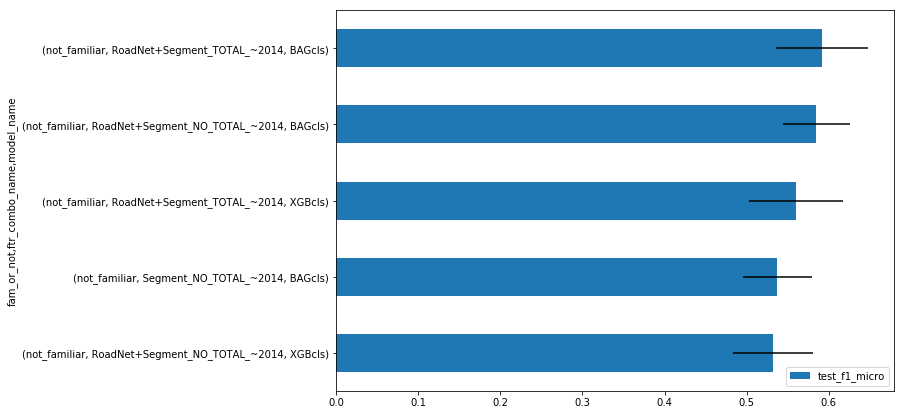

In [44]:
f1_type = f1_choices[2]
print('f1_type =', f1_type)

means_to_plot = means[[f1_type]].sort_values(f1_type, ascending=True)
stds_to_plot = stds[[f1_type]]

df_top_n = 10
plot_top_n = 5
means_to_plot.iloc[-plot_top_n:].plot(kind='barh', figsize=(10,7), xerr=stds_to_plot)
means.loc[means_to_plot.iloc[:-(df_top_n+1):-1,:].index].drop([x for x in f1_choices if x != f1_type], axis=1)

f1_type = test_f1_micro


test_f1_micro  \
fam_or_not   upsample ftr_combo_name                 model_name feature_selection                  
not_familiar None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                    0.591250   
                      RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                    0.585000   
                      RoadNet+Segment_TOTAL_~2014    XGBcls     None                    0.560000   
                      Segment_NO_TOTAL_~2014         BAGcls     None                    0.537500   
                      RoadNet+Segment_NO_TOTAL_~2014 XGBcls     None                    0.532500   
                      RoadNet                        BAGcls     None                    0.528750   
                                                     XGBcls     None                    0.523750   
familiar     None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                    0.517808   
                      RoadNet                        RFreg      None                    0.516438   
                      RoadNet+Segment_TOTAL_~2014    RFreg      None                    0.516438   

                                                                                   #test_sample  \
fam_or_not   upsample ftr_combo_name                 model_name feature_selection                 
not_familiar None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                       80.0   
                      RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       80.0   
                      RoadNet+Segment_TOTAL_~2014    XGBcls     None                       80.0   
                      Segment_NO_TOTAL_~2014         BAGcls     None                       80.0   
                      RoadNet+Segment_NO_TOTAL_~2014 XGBcls     None                       80.0   
                      RoadNet                        BAGcls     None                       80.0   
                                                     XGBcls     None                       80.0   
familiar     None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                       73.0   
                      RoadNet                        RFreg      None                       73.0   
                      RoadNet+Segment_TOTAL_~2014    RFreg      None                       73.0   

                                                                                   #train_sample  \
fam_or_not   upsample ftr_combo_name                 model_name feature_selection                  
not_familiar None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                       316.0   
                      RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       316.0   
                      RoadNet+Segment_TOTAL_~2014    XGBcls     None                       316.0   
                      Segment_NO_TOTAL_~2014         BAGcls     None                       316.0   
                      RoadNet+Segment_NO_TOTAL_~2014 XGBcls     None                       316.0   
                      RoadNet                        BAGcls     None                       316.0   
                                                     XGBcls     None                       316.0   
familiar     None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                       290.0   
                      RoadNet                        RFreg      None                       290.0   
                      RoadNet+Segment_TOTAL_~2014    RFreg      None                       290.0   

                                                                                   test_n_classes  \
fam_or_not   upsample ftr_combo_name                 model_name feature_selection                   
not_familiar None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                          4.9   
                      RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                          4.9   
                      RoadNet+Segment_TOTAL_~2014    XGBcls     None                    

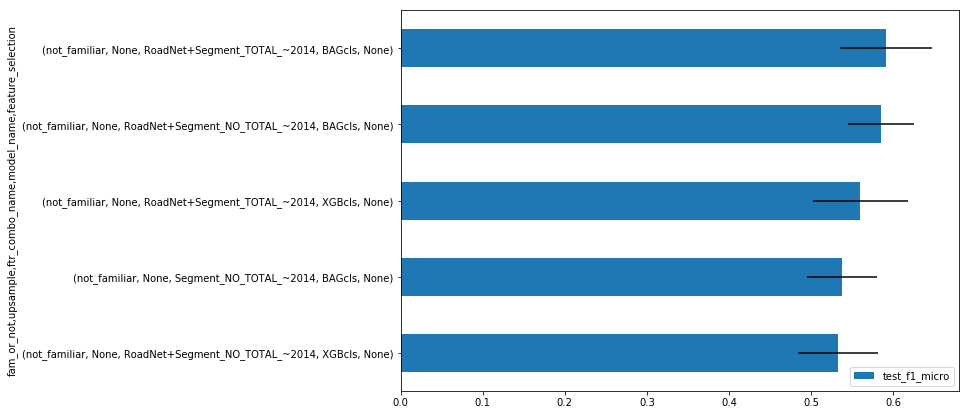

In [31]:
f1_type = f1_choices[2]
print('f1_type =', f1_type)

means_to_plot = means[[f1_type]].sort_values(f1_type, ascending=True)
stds_to_plot = stds[[f1_type]]

df_top_n = 10
plot_top_n = 5
means_to_plot.iloc[-plot_top_n:].plot(kind='barh', figsize=(10,7), xerr=stds_to_plot)
means.loc[means_to_plot.iloc[:-(df_top_n+1):-1,:].index].drop([x for x in f1_choices if x != f1_type], axis=1)

In [37]:
def get_paper_table(means, f1_type, key_cols):
    cols_name_convert = {'RoadNet': 'RoadNet', 'RoadNet+Segment_NO_TOTAL_~2014': 'RoadNet+Segment type',
     'RoadNet+Segment_TOTAL_~2014': 'RoadNet+Segment total', 'Segment_NO_TOTAL_~2014': 'Segment type',
     'Segment_TOTAL_~2014': 'Segment total'}
    means_for_pivot = means.reset_index()
    means_for_pivot['key'] = means_for_pivot.apply(lambda x: tuple([x[col] for col in key_cols]), axis=1)
    table = means_for_pivot.reset_index().pivot(index='key', columns='ftr_combo_name', values=f1_type)
    table.index = pd.MultiIndex.from_tuples(table.index, names=key_cols)    
    table.columns.name = f1_type
    table.columns = [cols_name_convert[col] for col in table.columns]
    return table[['RoadNet', 'Segment total', 'Segment type', 'RoadNet+Segment total', 'RoadNet+Segment type']]

In [45]:
key_cols = [k for k in keys if k!='ftr_combo_name']
table = get_paper_table(means, f1_type, key_cols)

In [47]:
# table.to_csv('deliverables/experiment_1001/exp9.csv', encoding='utf8')

In [46]:
table

RoadNet  Segment total  Segment type  \
fam_or_not   model_name                                          
familiar     BAGcls      0.505479       0.441096      0.494521   
             RFreg       0.516438       0.450685      0.445205   
             XGBcls      0.480822       0.447945      0.486301   
not_familiar BAGcls      0.528750       0.456250      0.537500   
             RFreg       0.478750       0.452500      0.458750   
             XGBcls      0.523750       0.470000      0.511250   

                         RoadNet+Segment total  RoadNet+Segment type  
fam_or_not   model_name                                               
familiar     BAGcls                   0.517808              0.506849  
             RFreg                    0.516438              0.479452  
             XGBcls                   0.494521              0.498630  
not_familiar BAGcls                   0.591250              0.585000  
             RFreg                    0.506250              0.478750  
             XGBcls                   0.560000              0.532500